<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>NLP with Deep Learning for Everyone</h1>
<h1>Sequence Modeling</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import gzip
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt 

from tqdm import tqdm
tqdm.pandas()

import keras
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import LSTM, GRU
from keras.layers import Dense
from keras.datasets import imdb
from keras.preprocessing import sequence

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: fddcc6deef2f9453a6d1888c1e5c49df7db7a98b

matplotlib: 3.3.2
pandas    : 1.1.3
keras     : 2.4.3
numpy     : 1.19.2
watermark : 2.1.0
json      : 2.0.9
tensorflow: 2.4.1



Load default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Load the IMDB dataset

In [4]:
top_words = 10000
max_words = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

word_dict = imdb.get_word_index()
word_list = ["<PAD>", "<START>", "<UNK>", "<UNUSED>"]
word_list.extend([k for k, v in sorted(word_dict.items(), key = lambda x:x[1])])
word_list = np.array(word_list)

In [5]:
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# SimpleRNN model

In [6]:
model = Sequential()
model.add(Embedding(top_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 39s 191ms/step - loss: 0.6381 - accuracy: 0.6006 - val_loss: 0.4634 - val_accuracy: 0.7853
Epoch 2/10
196/196 [==============================] - 32s 164ms/step - loss: 0.3468 - accuracy: 0.8594 - val_loss: 0.3683 - val_accuracy: 0.8483
Epoch 3/10
196/196 [==============================] - 20s 102ms/step - loss: 0.2629 - accuracy: 0.8994 - val_loss: 0.3597 - val_accuracy: 0.8549
Epoch 4/10
196/196 [==============================] - 21s 105ms/step - loss: 0.2344 - accuracy: 0.9107 - val_loss: 0.3593 - val_accuracy: 0.8469
Epoch 5/10
196/196 [==============================] - 21s 109ms/step - loss: 0.1617 - accuracy: 0.9438 - val_loss: 0.3909 - val_accuracy: 0.8514
Epoch 6/10
196/196 [==============================] - 21s 108ms/step - loss: 0.1025 - accuracy: 0.9682 - val_loss: 0.4332 - val_accuracy: 0.8504
Epoch 7/10
196/196 [==============================] - 22s 112ms/step - loss: 0.0737 - accuracy: 0.9778 - val_loss: 0.4928 - val_ac

In [8]:
def plot_history(history):    
    fig, ax_lst = plt.subplots(1, 2, sharex=True, sharey=True)

    epochs = np.array(history.epoch) + 1
    
    ax_lst[0].plot(epochs, history.history['loss'], label='Training')
    ax_lst[0].plot(epochs, history.history['val_loss'], label='Testing')
    ax_lst[0].set_ylabel('Loss')
    ax_lst[0].set_xlabel('Epoch')
    ax_lst[0].set_xticks(epochs)
    
    best_epoch = np.argmin(history.history['val_loss']) + 1
    ax_lst[0].axvline(x=best_epoch, linestyle=':', color=colors[2])
    ax_lst[0].legend()
    

    ax_lst[1].plot(epochs, history.history['accuracy'], label='Training')
    ax_lst[1].plot(epochs, history.history['val_accuracy'], label='Testing')
    ax_lst[1].set_ylabel('Accuracy')
    ax_lst[1].set_xlabel('Epoch')
    ax_lst[1].set_xticks(epochs)
    ax_lst[1].axvline(x=best_epoch, linestyle=':', color=colors[2])


    fig.tight_layout()

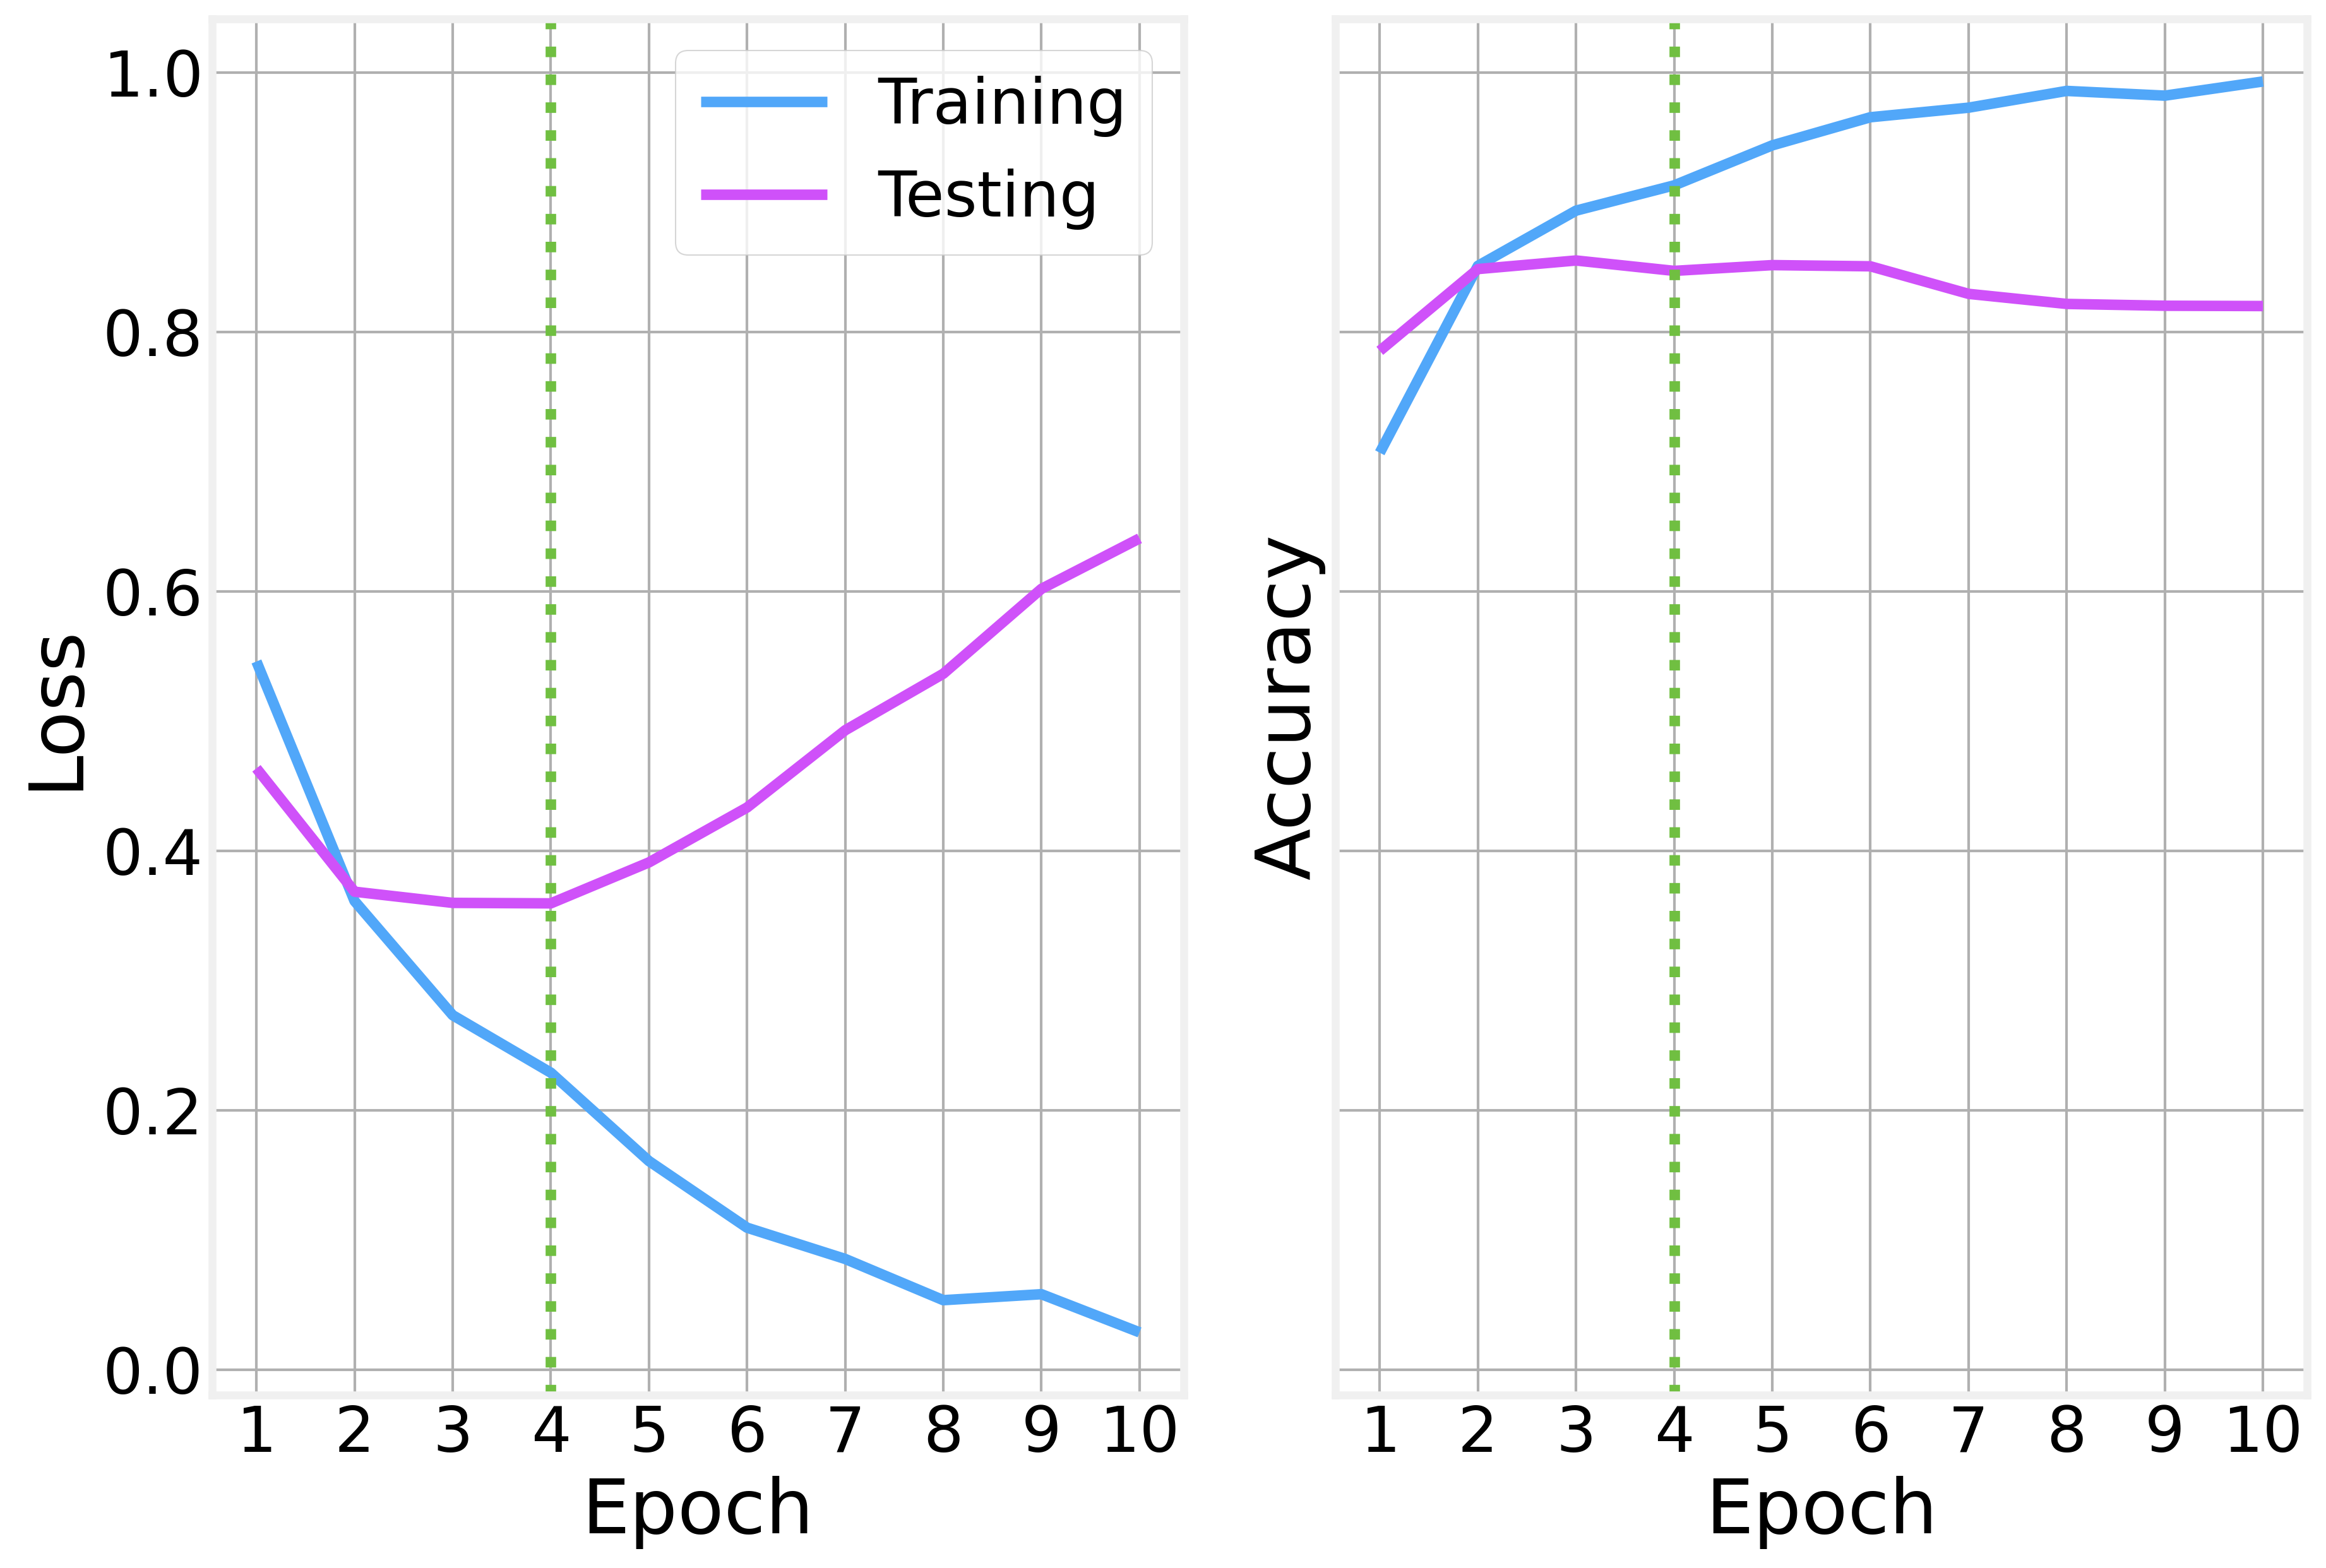

In [9]:
plot_history(history)

# GRU

In [10]:
model = Sequential()
model.add(Embedding(top_words, 32))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 42s 209ms/step - loss: 0.6072 - accuracy: 0.6286 - val_loss: 0.3399 - val_accuracy: 0.8560
Epoch 2/10
196/196 [==============================] - 37s 190ms/step - loss: 0.2668 - accuracy: 0.8942 - val_loss: 0.3222 - val_accuracy: 0.8708
Epoch 3/10
196/196 [==============================] - 39s 199ms/step - loss: 0.1897 - accuracy: 0.9329 - val_loss: 0.3261 - val_accuracy: 0.8629
Epoch 4/10
196/196 [==============================] - 37s 191ms/step - loss: 0.1619 - accuracy: 0.9447 - val_loss: 0.3441 - val_accuracy: 0.8671
Epoch 5/10
196/196 [==============================] - 37s 190ms/step - loss: 0.1234 - accuracy: 0.9610 - val_loss: 0.3707 - val_accuracy: 0.8664
Epoch 6/10
196/196 [==============================] - 38s 192ms/step - loss: 0.1034 - accuracy: 0.9678 - val_loss: 0.3923 - val_accuracy: 0.8571
Epoch 7/10
196/196 [==============================] - 38s 194ms/step - loss: 0.1048 - accuracy: 0.9658 - val_loss: 0.4208 - val_ac

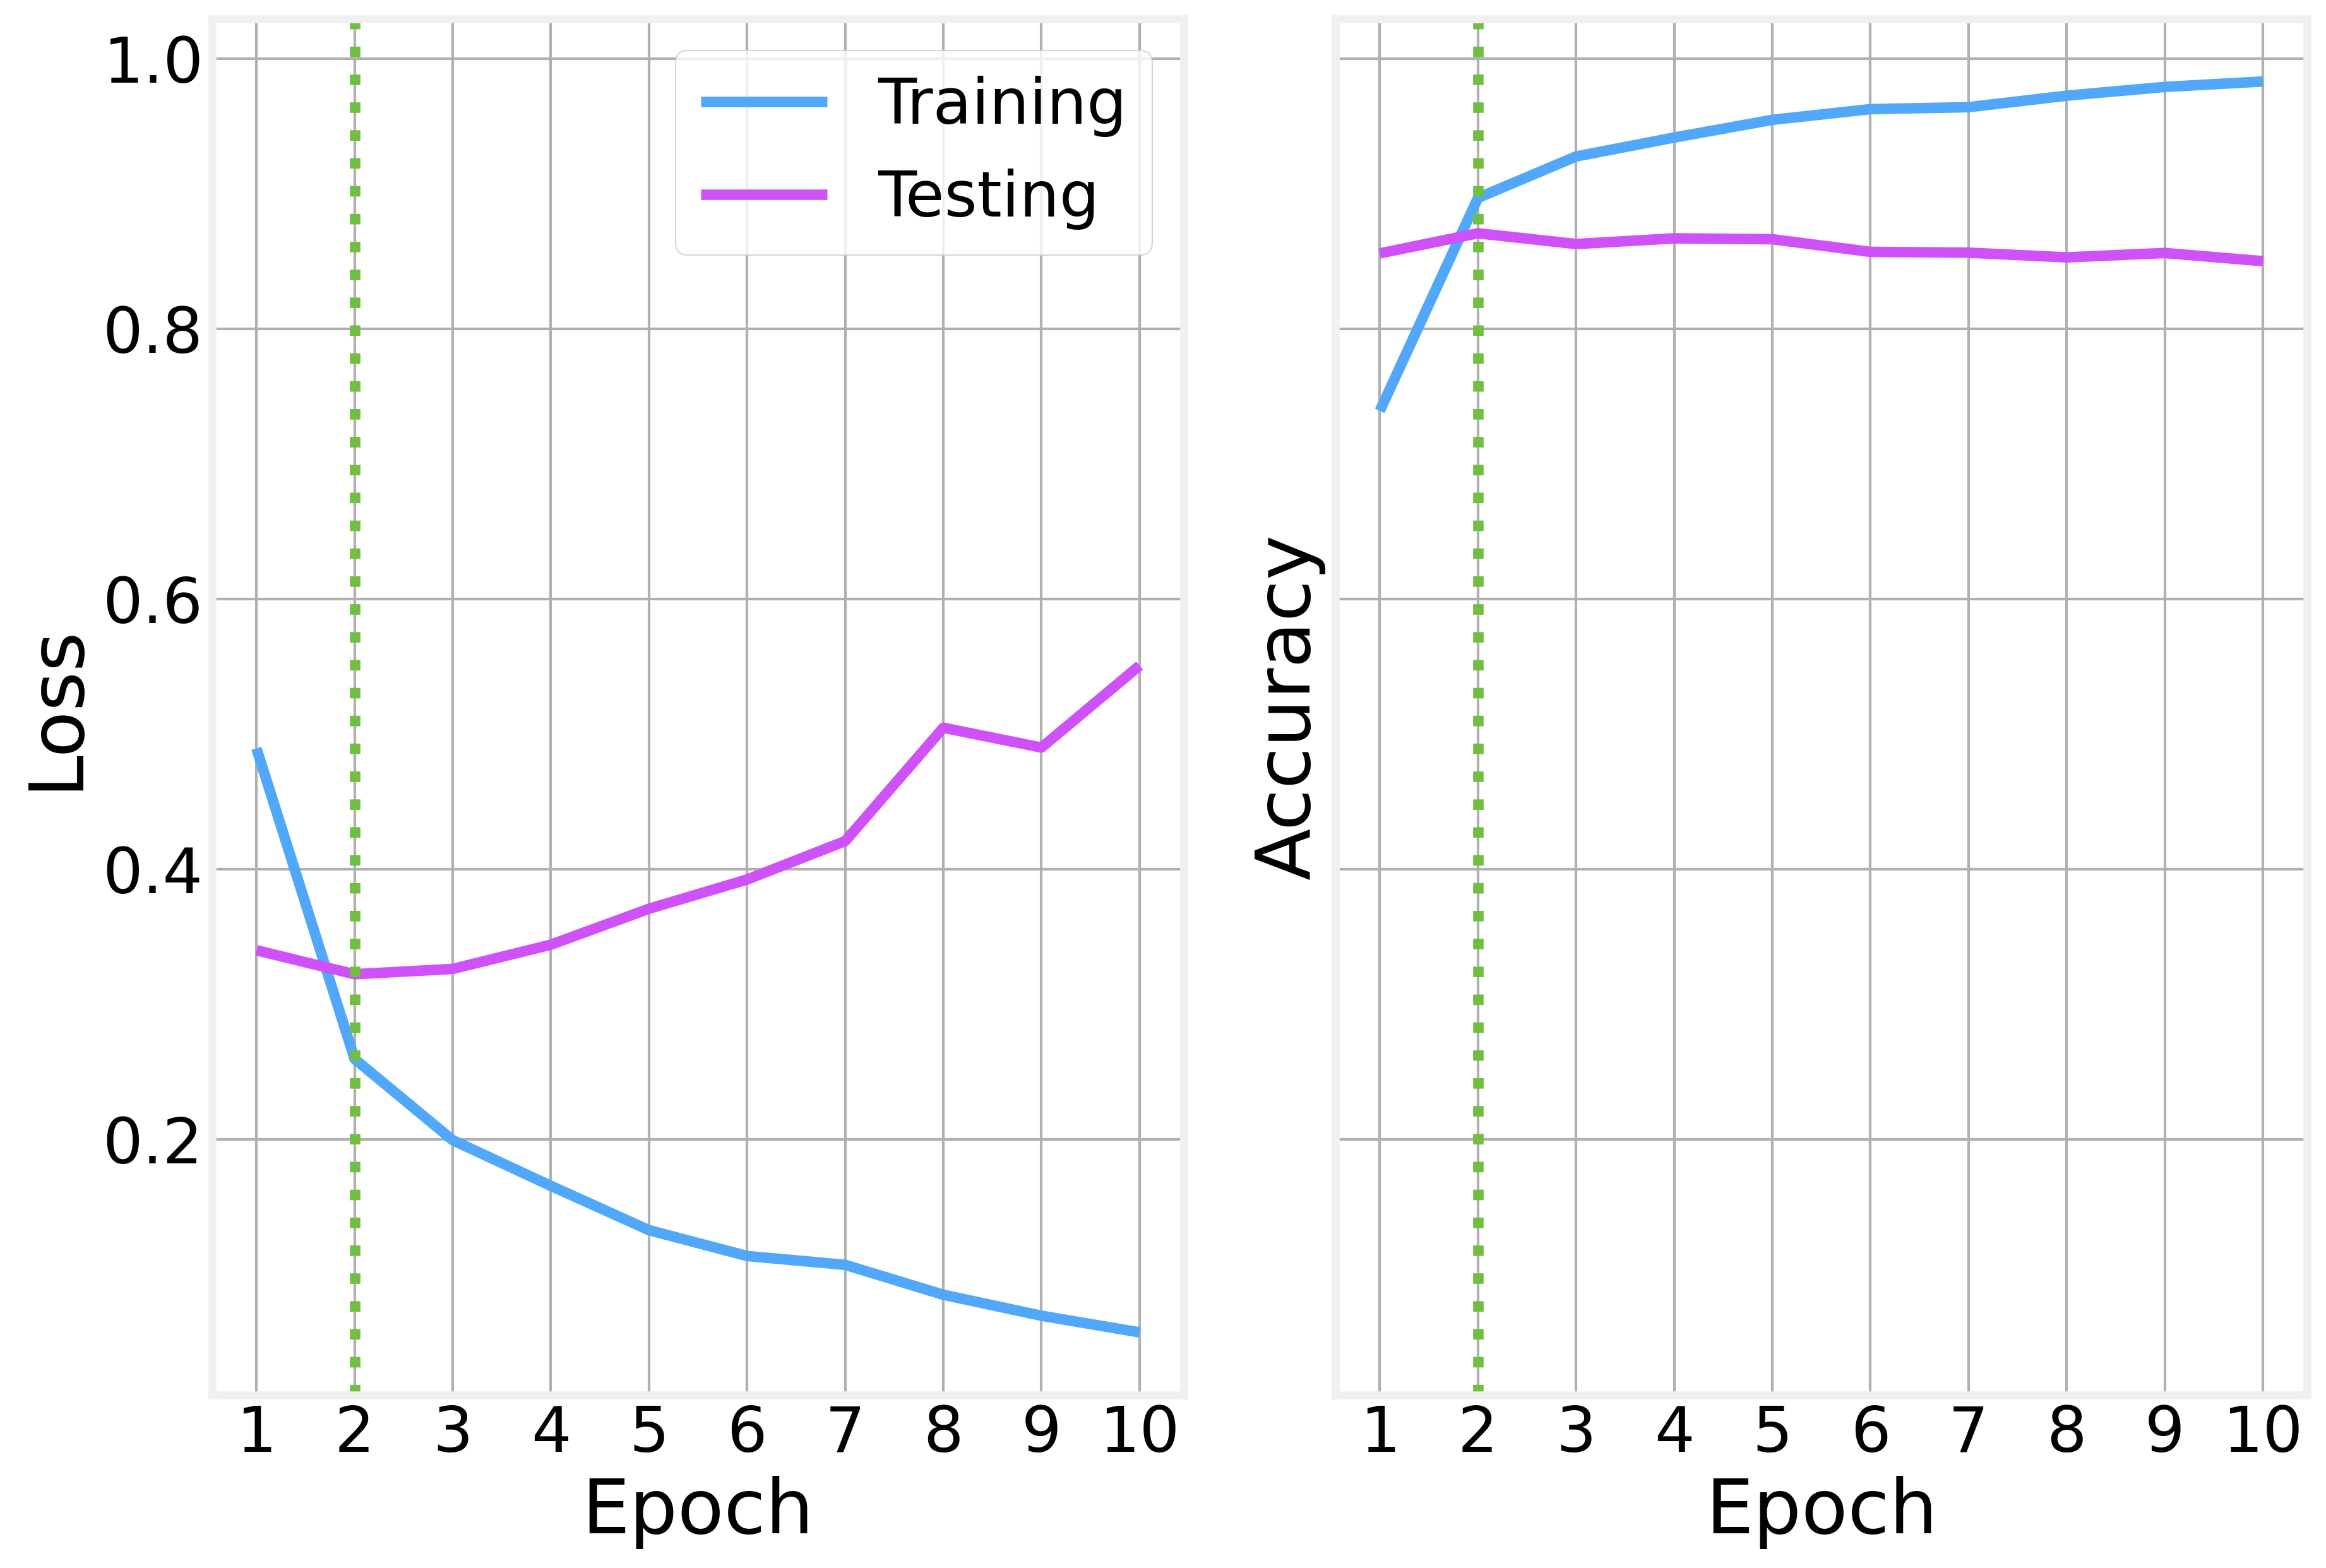

In [12]:
plot_history(history)

# LSTM

In [13]:
model = Sequential()
model.add(Embedding(top_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 43s 210ms/step - loss: 0.6056 - accuracy: 0.6483 - val_loss: 0.3319 - val_accuracy: 0.8628
Epoch 2/10
196/196 [==============================] - 40s 204ms/step - loss: 0.2637 - accuracy: 0.8995 - val_loss: 0.2958 - val_accuracy: 0.8809
Epoch 3/10
196/196 [==============================] - 42s 214ms/step - loss: 0.1876 - accuracy: 0.9353 - val_loss: 0.3070 - val_accuracy: 0.8770
Epoch 4/10
196/196 [==============================] - 39s 199ms/step - loss: 0.1506 - accuracy: 0.9517 - val_loss: 0.3541 - val_accuracy: 0.8636
Epoch 5/10
196/196 [==============================] - 40s 204ms/step - loss: 0.1163 - accuracy: 0.9646 - val_loss: 0.3705 - val_accuracy: 0.8700
Epoch 6/10
196/196 [==============================] - 39s 201ms/step - loss: 0.1020 - accuracy: 0.9694 - val_loss: 0.4613 - val_accuracy: 0.8578
Epoch 7/10
196/196 [==============================] - 40s 204ms/step - loss: 0.0955 - accuracy: 0.9704 - val_loss: 0.4347 - val_ac

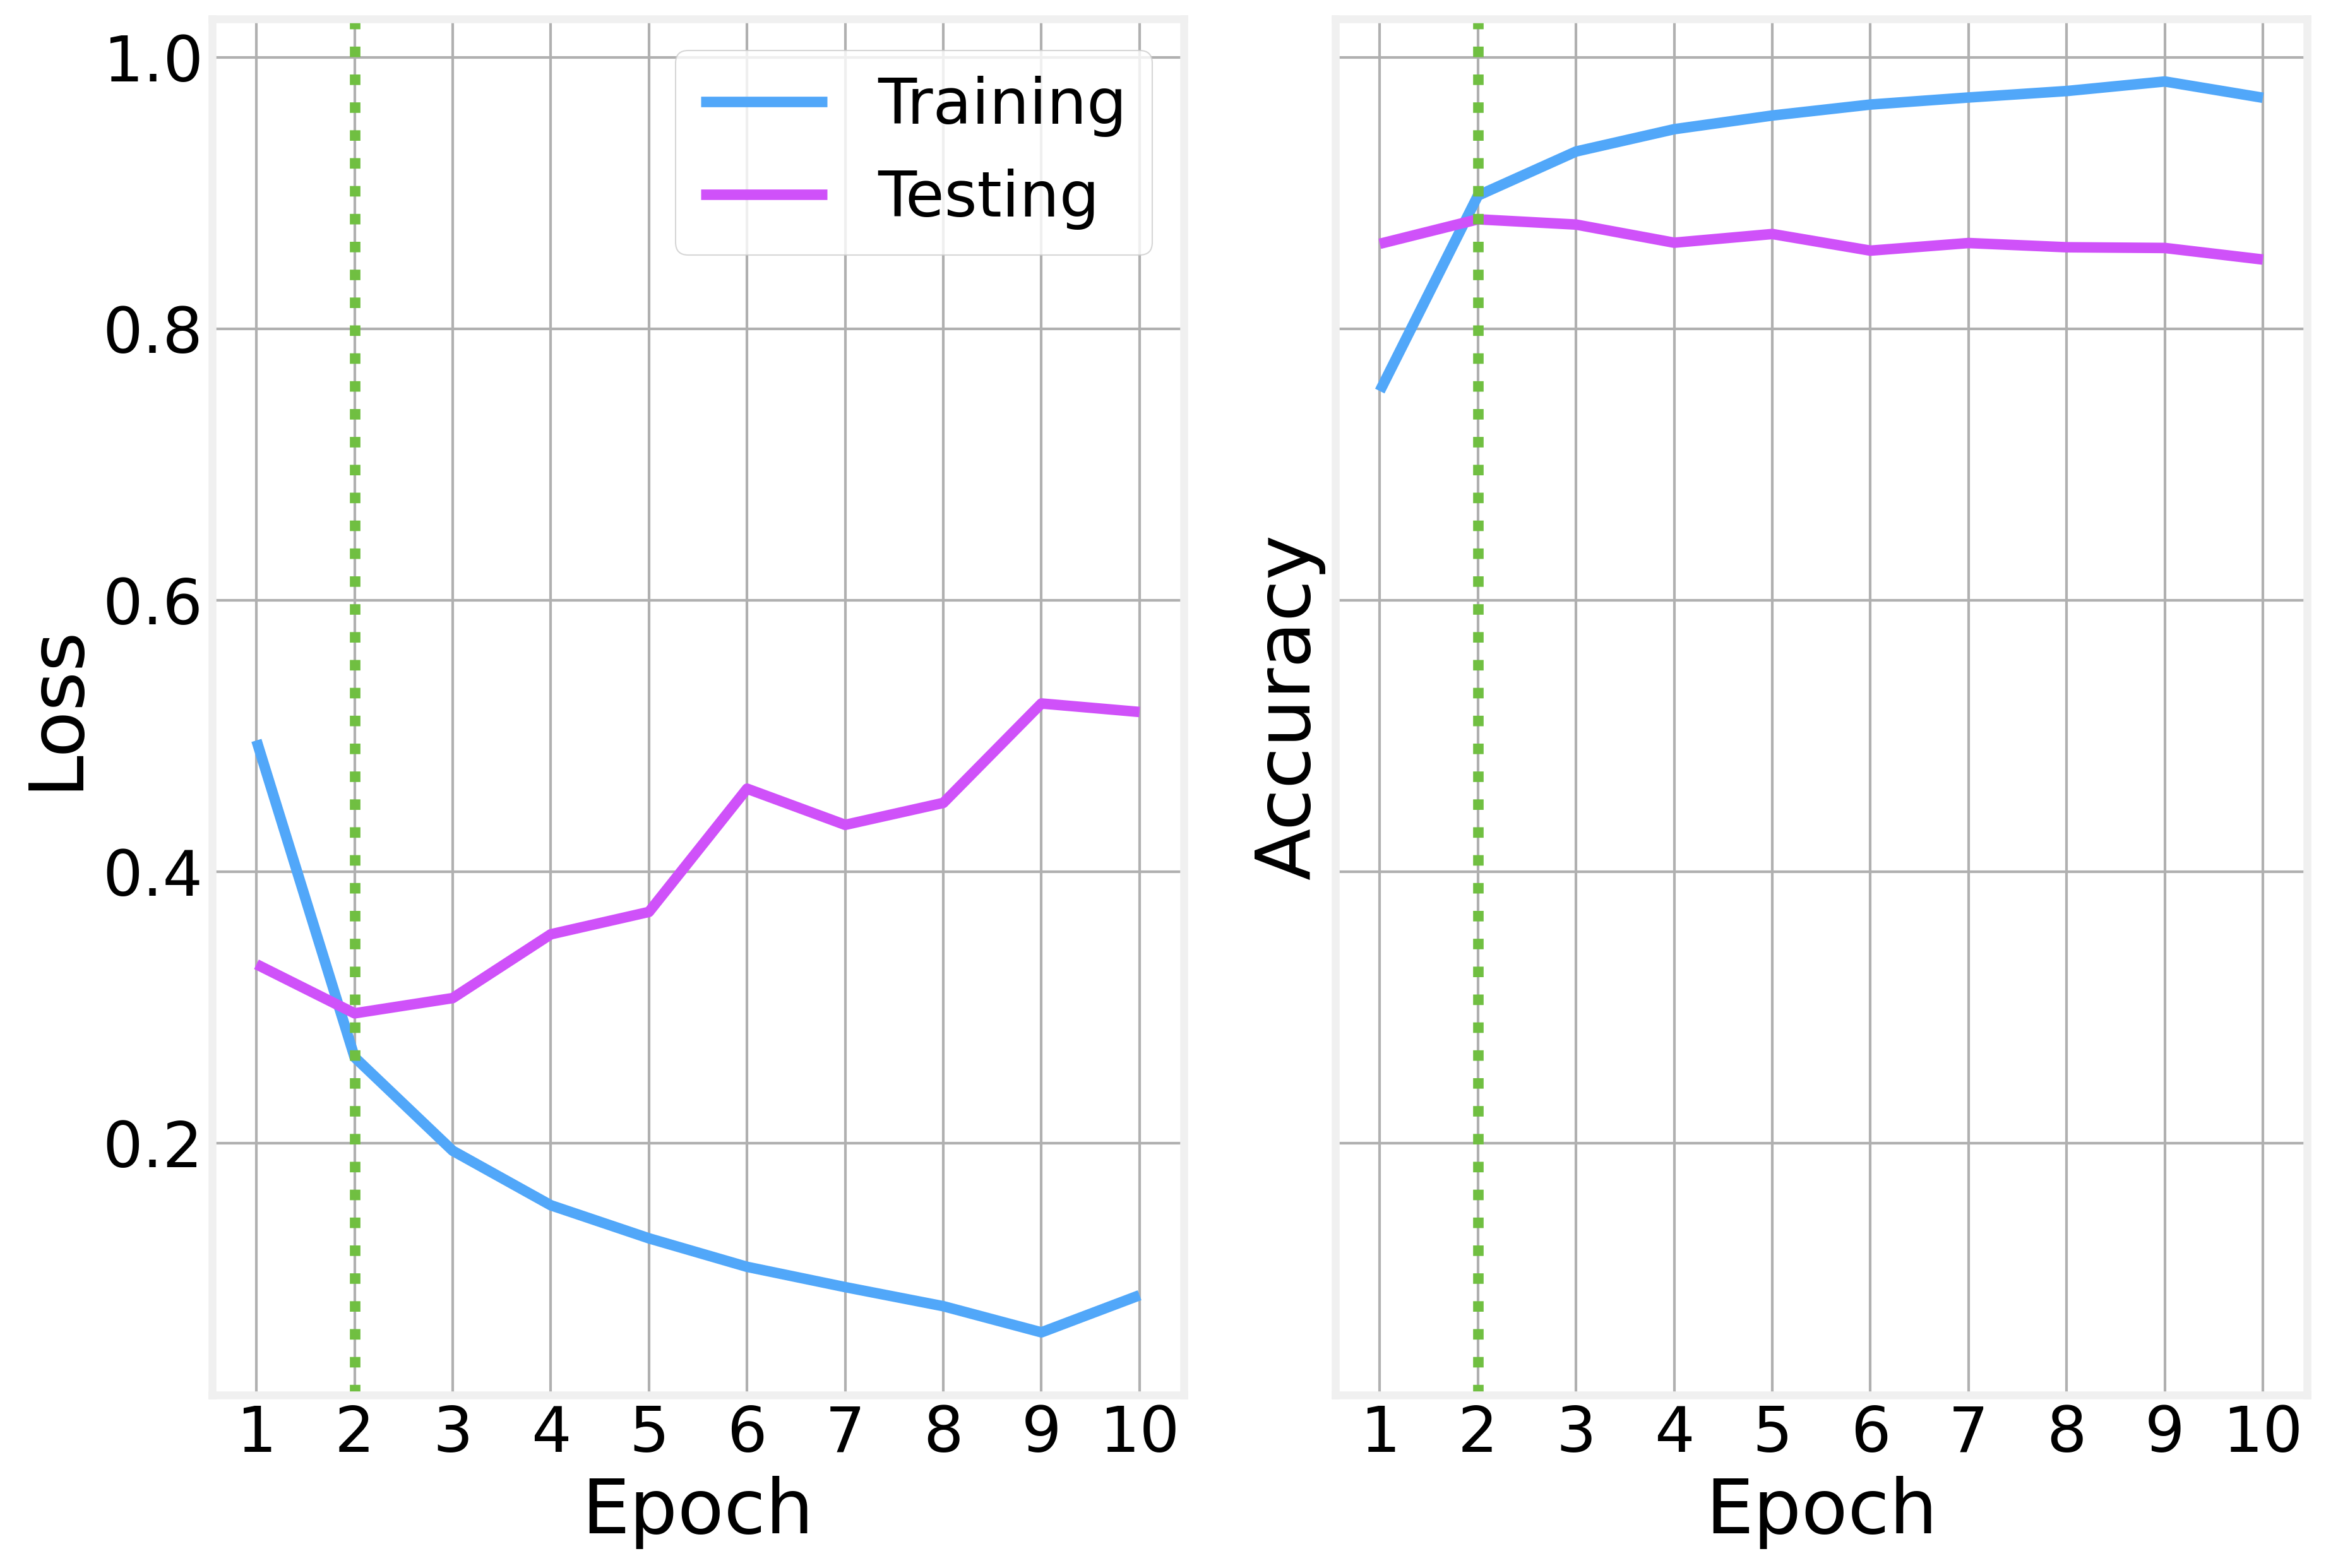

In [15]:
plot_history(history)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>